In [1]:
import pandas as pd
import numpy as np

file_to_load = 'JEOPARDY_CSV.csv'

jeopardy_df = pd.read_csv(file_to_load)

In [2]:
jeopardy_df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [9]:
#How many rows are there in the dataframe? What does a row represent in this
#dataset? What is the “grain”?

#row represents a jeopardy question
#216,930 questions

jeopardy_df.count()

Show Number    216930
Air Date       216930
Round          216930
Category       216930
Value          216930
Question       216930
Answer         216928
Year           216930
dtype: int64

In [3]:
jeopardy_df.columns = jeopardy_df.columns.str.rstrip()
jeopardy_df.columns = jeopardy_df.columns.str.lstrip()

jeopardy_df.columns

#Clean the data. How do you need to “clean” it? What is “dirty” about this data?
# cleaning the columns - blank characters out

Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

In [32]:
jeopardy_df['Year'] = pd.DatetimeIndex(jeopardy_df['Air Date']).year

#print(jeopardy_df.head())

unique_shows_per_year = jeopardy_df.groupby('Year')['Show Number'].nunique()
unique_shows_per_year

#How many unique shows were there each year?

Year
1984     23
1985     16
1986     25
1987     22
1988     22
1989     36
1990     73
1991     24
1992     32
1993     35
1994     19
1995     19
1996     83
1997    221
1998    223
1999    229
2000    225
2001    203
2002    114
2003    158
2004    220
2005    225
2006    230
2007    231
2008    232
2009    226
2010    231
2011    224
2012     19
Name: Show Number, dtype: int64

In [5]:
values = jeopardy_df.groupby('Year')['Value']
values.head()

0        $200 
1        $200 
2        $200 
3        $200 
4        $200 
         ...  
13726    $100 
13727    $100 
13728    $100 
13729    $100 
13730    $100 
Name: Value, Length: 145, dtype: object

In [10]:
#How many times was each category used?

jeopardy_df['Category'].value_counts()

BEFORE & AFTER        547
SCIENCE               519
LITERATURE            496
AMERICAN HISTORY      418
POTPOURRI             401
                     ... 
20th CENTURY OPERA      1
PLAY & FILM TITLES      1
FAMOUS LANDMARKS        1
CLIMATE TERMS           1
FAMOUS TEENAGERS        1
Name: Category, Length: 27983, dtype: int64

In [13]:
#Which month (over the years) has had the most shows?

jeopardy_df['Month'] = pd.DatetimeIndex(jeopardy_df['Air Date']).month

jeopardy_df['Month'].value_counts()

11    25672
1     21128
5     21052
12    20875
10    20510
3     19731
4     19654
6     19331
2     17501
9     16053
7     15423
Name: Month, dtype: int64

In [27]:
#Are there any answers that appeared multiple times? Find the questions for the top
#three most common answers.

answers_df = jeopardy_df.groupby('Answer')['Question'].count()

#answers_df = jeopardy_df.drop_duplicates(subset=['Answer'])

answers_df.head()

Answer
 Hamlet                  1
 Les Miserables          1
 Nosferatu               1
 She Loves You           1
 Sleepless in Seattle    1
Name: Question, dtype: int64

In [31]:
jeopardy_df['Answer'].value_counts()

#merge, join

China            216
Australia        215
Japan            196
Chicago          194
France           193
                ... 
Glamis             1
Queen's beans      1
"I'm Glad"         1
Y-A-C-H-T          1
The Prisoner       1
Name: Answer, Length: 88236, dtype: int64

In [73]:
# I don't know what to do next to get the quesitions for each top answer
# For the top three answers, pull the question/answer pair into a new dataframe?

top3answers = ['China', 'Australia', 'Japan']
jeopardy_df.loc[jeopardy_df['Answer'].isin(top3answers)]

,Show Number,Air Date,Round,Category,Value,Question,Answer,Year,Month
404,2825,12/6/1996,Double Jeopardy!,HISTORY,$600,In February 1904 this country attacked the Rus...,Japan,1996,12
560,3036,11/10/1997,Jeopardy!,AT THE KENNEDY CENTER,$500,A 1994 festival honoring this country featured...,Australia,1997,11
598,4107,6/11/2002,Jeopardy!,REMEMBER THE TIME,$200,In 1958 this country launched its second 5-yea...,China,2002,6
688,2735,6/21/1996,Double Jeopardy!,WORLD GEOGRAPHY,$200,Large aboriginal populations live in this coun...,Australia,1996,6
874,4541,5/10/2004,Double Jeopardy!,GROSS NATIONAL PRODUCTS,"$1,200",Sanma aisu is fish-flavored ice cream & taco a...,Japan,2004,5
...,...,...,...,...,...,...,...,...,...
215568,3589,3/23/2000,Jeopardy!,BEER COUNTRY OF ORIGIN,$400,Kirin,Japan,2000,3
215912,6003,10/20/2010,Final Jeopardy!,COUNTRY DEMOGRAPHICS,None,"Because of a policy adopted in 1979, this coun...",China,2010,10
216044,4364,7/17/2003,Jeopardy!,"MONEY, MONEY, MONEY",$600,Norfolk Island & the Republic of Kiribati use ...,Australia,2003,7
216150,1983,3/31/1993,Jeopardy!,FASHION,$100,Colorful patches called p'u-fang used to indic...,China,1993,3


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#top 5 categories

top5cat = pd.DataFrame(jeopardy_df['Category'].value_counts())

In [61]:
top5cat = top5cat.head()
print(top5cat.index)
top5cat

Index(['BEFORE & AFTER', 'SCIENCE', 'LITERATURE', 'AMERICAN HISTORY',
       'POTPOURRI'],
      dtype='object')


,Category
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401


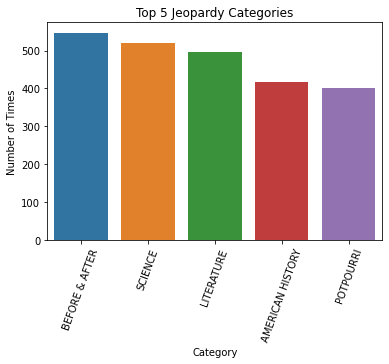

In [83]:
myplot = sns.barplot(x=top5cat.index, y='Category', data = top5cat) 
#could use myplot (ax object) .set to label title, x axis, y axis
plt.title('Top 5 Jeopardy Categories')
plt.xlabel('Category')
plt.ylabel("Number of Times")
plt.xticks(rotation=70)
plt.show()